In [133]:
# Import basic libraries

import numpy as np
import pandas as pd
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [62]:
# Read table from wikipedia page

df = pd.read_html('https://en.wikipedia.org/wiki/Template:2019%E2%80%9320_coronavirus_pandemic_data')[0]

In [164]:
# Check the columns

df.columns

Index(['Countries', 'Cases', 'Deaths', 'Recovered'], dtype='object')

In [64]:
# Remove unneccessory columns

df = df.iloc[:, 1:5]

In [65]:
df.head()

,Countries and territories[a],Cases[b],Deaths[c],Recov.[d]
,‍225.1,"‍2,790,986","‍195,920","‍781,382"
0,United States[e],927150,52400,101315
1,Spain,219764,22524,92355
2,Italy,192994,25969,60498
3,Germany[f],154999,5760,99928
4,United Kingdom[g],143464,19506,—


In [66]:
# Remove MultiIndex Level and rename columns

df.columns = ['_'.join(col) for col in df.columns]

# Rename columns

df.columns = ['Countries', 'Cases', 'Deaths', 'Recovered']

In [110]:
# Remove last couple of rows and unnecessory rows from Dataframe

#df = df[:-2]

df[df.Countries != 'International conveyances']

,Countries,Cases,Deaths,Recovered
0,United States,927150,52400,101315
1,Spain,219764,22524,92355
2,Italy,192994,25969,60498
3,Germany,154999,5760,99928
4,United Kingdom,143464,19506,—
...,...,...,...,...
222,Greg Mortimer,128,0,—
223,MS Zaandam,13,4,—
224,Coral Princess,12,2,—
225,HNLMS Dolfijn,8,0,—


In [81]:
# Clean Country names e.g. includng '[]'

def rename_country(col):
    if '[' in col:
        col = col.split('[')[0]
    return col

df['Countries'] = df['Countries'].apply(rename_country)

In [115]:
# Change Object data type columns to Integer

#df[['Deaths', 'Recovered']] = df[['Deaths', 'Recovered']].astype(int)

df.to_csv('D:\\Study\\DataScience\\Data\\co.csv')

In [142]:
# Create a new dataframe consisiting of top 50 countires based on number of cases
data_top50 = data.sort_values('Cases', ascending = False).head(50)

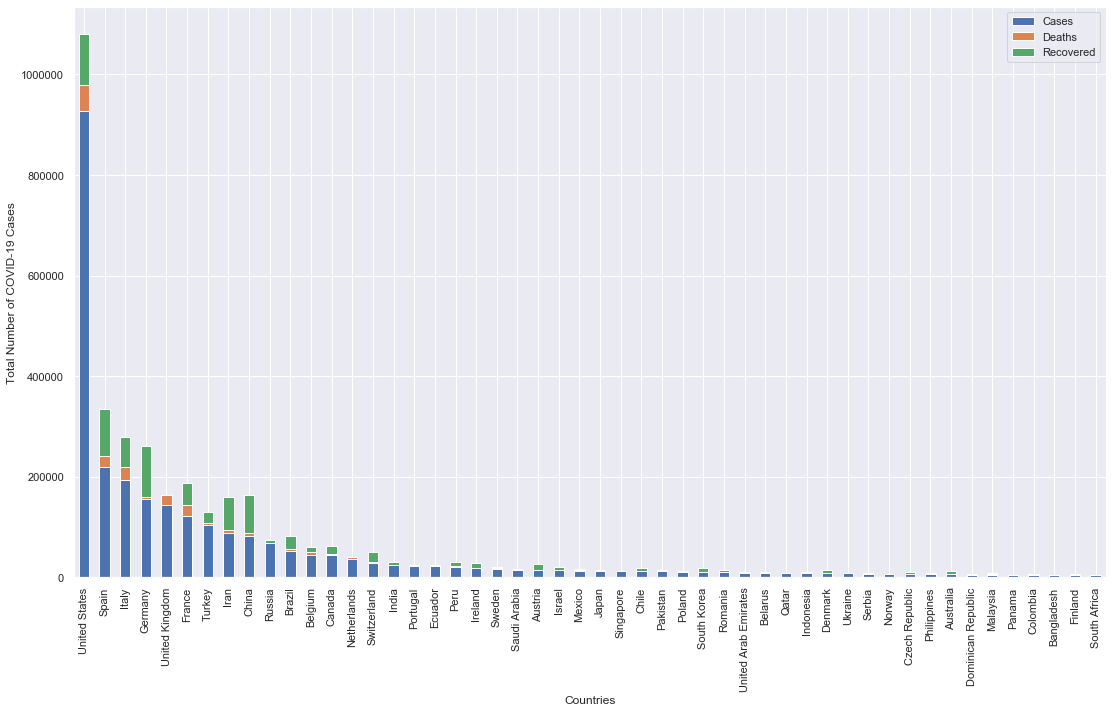

In [162]:
# Plot the stacked bar plot
# Set the index as Countries if it is not
#data_top50.set_index('Countries', inplace = True)

ax = data_top50.plot(kind='bar', stacked=True, figsize=(18.5, 10.5))
ax.set_ylabel('Total Number of COVID-19 Cases')
plt.savefig('Stacked_Bar_CoronaTop50.png')
plt.show()

In [165]:
# Export the dataframe to csv

data_top50.to_csv('D:\\Study\\DataScience\\Data\\covid_top50.csv')